# My library - EDA

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import requests
from furl import furl
from math import ceil
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import sys
import pprint
import time

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.metrics import silhouette_score

pp = pprint.PrettyPrinter()
%config InlineBackend.figure_format ='retina'

In [2]:
df = pd.read_csv('data/hannah_tracks_and_audio_features.csv').drop('Unnamed: 0', axis=1)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df = df.drop_duplicates(subset='title')

In [5]:
df.shape

(2997, 24)

In [6]:
df.head()

,track_id,title,artist,album,album_id,time_added,danceability,energy,key,loudness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1GeId1N0DtmTpIfwr9aNQR,Lost in the Supermarket,The Clash,London Calling (Legacy Edition),3TZuLZx0zB3Q45aQXDswb9,['added_at'],0.610,0.594,4,-10.927,...,0.059,0.798,147.512,audio_features,1GeId1N0DtmTpIfwr9aNQR,spotify:track:1GeId1N0DtmTpIfwr9aNQR,https://api.spotify.com/v1/tracks/1GeId1N0DtmT...,https://api.spotify.com/v1/audio-analysis/1GeI...,227133,4
1,1d0RJmZXAncCnTYHFlhaj4,The Guns of Brixton,The Clash,London Calling (Legacy Edition),3TZuLZx0zB3Q45aQXDswb9,['added_at'],0.745,0.604,7,-9.311,...,0.116,0.648,96.514,audio_features,1d0RJmZXAncCnTYHFlhaj4,spotify:track:1d0RJmZXAncCnTYHFlhaj4,https://api.spotify.com/v1/tracks/1d0RJmZXAncC...,https://api.spotify.com/v1/audio-analysis/1d0R...,189667,4
2,6aLCZUnreez0cBOjKNeLDH,Spanish Bombs,The Clash,London Calling (Legacy Edition),3TZuLZx0zB3Q45aQXDswb9,['added_at'],0.616,0.776,9,-7.929,...,0.178,0.731,149.017,audio_features,6aLCZUnreez0cBOjKNeLDH,spotify:track:6aLCZUnreez0cBOjKNeLDH,https://api.spotify.com/v1/tracks/6aLCZUnreez0...,https://api.spotify.com/v1/audio-analysis/6aLC...,198867,4
3,124Y9LPRCAz3q2OP0iCvcJ,London Calling,The Clash,London Calling (Legacy Edition),3TZuLZx0zB3Q45aQXDswb9,['added_at'],0.654,0.799,0,-6.920,...,0.084,0.755,133.731,audio_features,124Y9LPRCAz3q2OP0iCvcJ,spotify:track:124Y9LPRCAz3q2OP0iCvcJ,https://api.spotify.com/v1/tracks/124Y9LPRCAz3...,https://api.spotify.com/v1/audio-analysis/124Y...,199733,4
4,4j4pPKE3xAblPIbhxScC1j,Rawnald Gregory Erickson the Second,STRFKR,Starfucker,4mBSeOEiQ4WgDaCnydb0tZ,['added_at'],0.900,0.538,7,-7.879,...,0.287,0.713,95.508,audio_features,4j4pPKE3xAblPIbhxScC1j,spotify:track:4j4pPKE3xAblPIbhxScC1j,https://api.spotify.com/v1/tracks/4j4pPKE3xAbl...,https://api.spotify.com/v1/audio-analysis/4j4p...,173693,4


In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000,2997.000
mean,0.516,0.576,5.351,-8.571,0.679,0.077,0.351,0.099,0.187,0.416,122.561,225178.495,3.885
std,0.158,0.263,3.608,4.264,0.467,0.090,0.355,0.228,0.149,0.228,30.471,85685.286,0.442
min,0.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12347.000,0.000
25%,0.406,0.371,2.000,-10.791,0.000,0.034,0.015,0.000,0.100,0.224,98.532,182880.000,4.000
50%,0.522,0.595,6.000,-7.609,1.000,0.043,0.199,0.000,0.123,0.388,120.094,218307.000,4.000
75%,0.624,0.809,9.000,-5.542,1.000,0.074,0.717,0.028,0.232,0.590,142.451,259623.000,4.000
max,0.974,0.998,11.000,-1.225,1.000,0.956,0.995,0.967,0.983,0.975,218.164,2520867.000,5.000


In [8]:
df.columns

Index(['track_id', 'title', 'artist', 'album', 'album_id', 'time_added',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [9]:
df_k = df
df_d = df

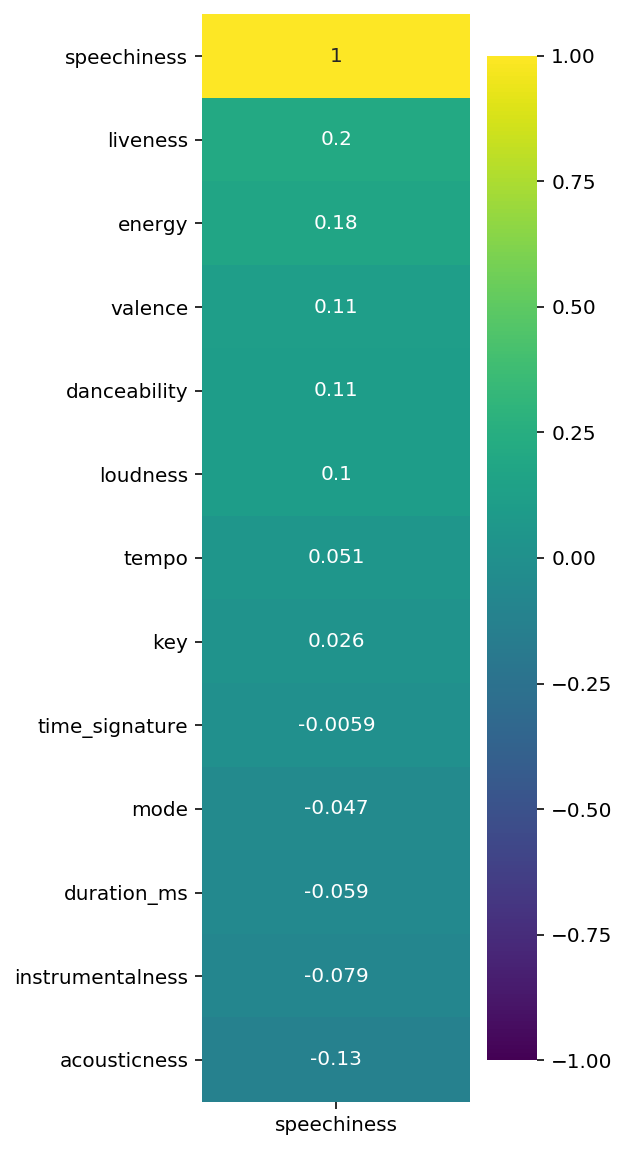

In [10]:
plt.figure(figsize=(3,10))
sns.heatmap(df.corr()[['speechiness']].sort_values('speechiness', ascending=False), 
            cmap='viridis', vmin=-1, vmax=1, annot=True);


Notes on correlations:

- **Danceability**: 
    - *Positive*:
        - valence: .34
        - time_signature: .17
        - speechiness .11
        - speechiness .11
    - *Negative:
        - tempo: -.2
        
- **Energy**: 
    - *Positive*:
        - .78 - loudness
        - .37 - valence
        - .22 - liveness
        - .22 - tempo
        - .19 - time signature
        - .16 - speechiness
    - *Negative:
        - -.78 - acousticness
        
- **Key**: 
    - *Negative:
        - -.2 - mode
        
- **Loudness**: 
    - *Positive*:
        - .78 - energy
        - .28 - valence
        - .19 - time_signature
        - .17 - tempo
        - .15 - liveness
    - *Negative:
        - -.63 - acousticness
        - -.19 - instrumentalness
     
- **mode**: 
    - *Negative:
        - -.2 - key
        
- **Speechiness**: 
    - *Positive*:
        - .19 - liveness
        - .16 - energy
        - .11 - danceability
    - *Negative:
        - 
        
- **f**: 
    - *Positive*:
        - 
    - *Negative:
        - 
        
- **f**: 
    - *Positive*:
        - 
    - *Negative:
        - 
       

In [11]:
X_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']

In [12]:
matplotlib.style.use('ggplot')


In [13]:
# Let's prepare our X matrix
# Jordan Weiss - NYC's code:

ss = StandardScaler()
X = ss.fit_transform(df[X_features])